In [1]:
pip install pandas tensorflow keras nltk 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
df = pd.read_csv(r"C:\Users\USER\Desktop\Amazon_Fine_Food_Review_Sentiment_Analysis\Reviews.csv")
print(df.head())

C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the 

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
# Check data structure and missinf values
# Total numver of rows and columns
print(f"Dataset shape: {df.shape}")

# Summary of dataframe
print("\nDataFrame Info:")
print(df.info())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (568454, 10)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

Missing values per column:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
Helpfuln

New dataset shape after dropping missing values: (568401, 10)


C:\Users\USER\AppData\Local\Temp\ipykernel_15856\1447041238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


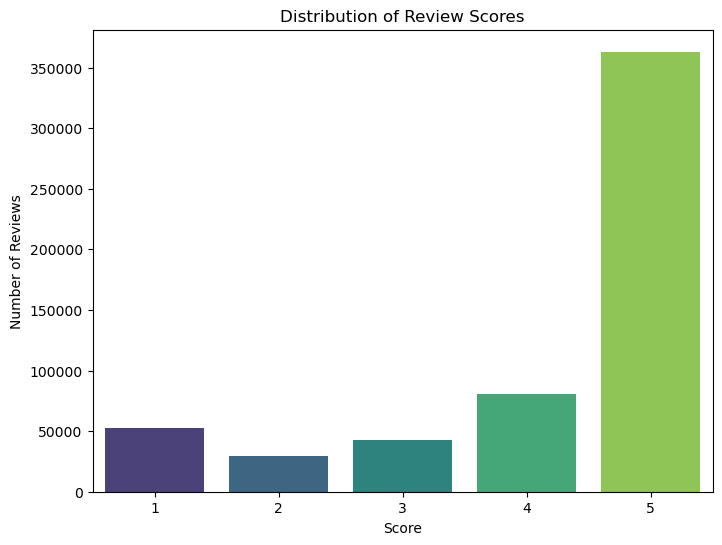

In [7]:
# Drop missing values
df.dropna(inplace=True)
print(f"New dataset shape after dropping missing values: {df.shape}")

# Visualize the distribution of the 'Score' 
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


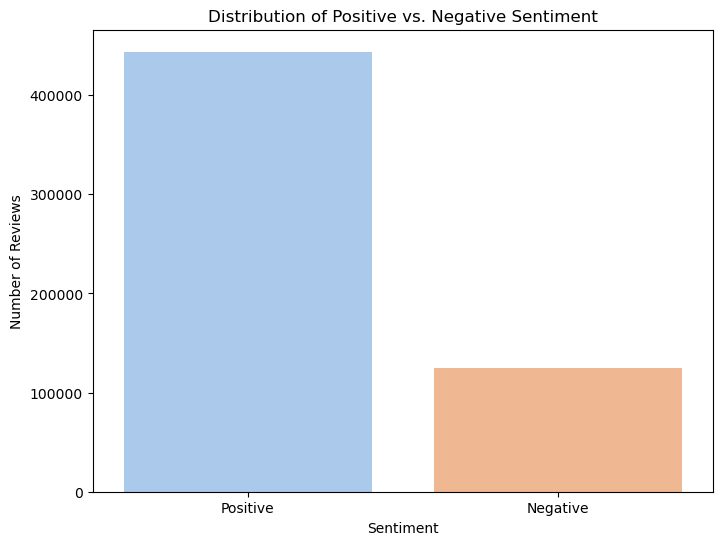


Final Sentiment Counts:
Sentiment
Positive    443756
Negative    124645
Name: count, dtype: int64


In [9]:
# Map scores to sentiment labels
def map_sentiment(score):
    if score >= 4:
        return 'Positive'
    else:
        return 'Negative'

# Create a Sentiment column
df['Sentiment'] = df['Score'].apply(map_sentiment)
print(df.head())

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, hue='Sentiment', legend=False, palette='pastel')
plt.title('Distribution of Positive vs. Negative Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
print("\nFinal Sentiment Counts:")
print(df['Sentiment'].value_counts())

In [11]:
reviews = df['Text'].values
labels = df['Sentiment'].values

# Parameters for tokenizer
vocab_size = 20000  # 20,000 most frequent words
embedding_dim = 128
max_length = 250
trunc_type = 'post'
padding_type = 'post'
oov_token = "<oov>" # Out-of-vocabulary 

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(reviews)

# Convert reviews to integers
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Display some information on tokenization
word_index = tokenizer.word_index
print(f"Number of unique words in our vocabulary: {len(word_index)}")
print(f"Example of a tokenized and padded review:\n{padded_sequences[0]}")

Number of unique words in our vocabulary: 133037
Example of a tokenized and padded review:
[   3   18  126  320    8    2 4941  524  104   53  205    4   18  118
   29   42    6   31    8   30  184    2   39  630   49   27    5 2637
   59    5 1184  449    4    7  620  100   14 5267    9 1778    4   95
 8696   10   39  100   59  141    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  

In [13]:
from tensorflow.keras.utils import to_categorical

# Map string labels to integers
label_mapping = {'Negative': 0, 'Positive': 1}
labels_as_integers = np.array([label_mapping[label] for label in df['Sentiment']])

# One-hot encode the integer labels
labels_one_hot = to_categorical(labels_as_integers)
print(f"Original shape of labels: {labels_as_integers.shape}")
print(f"One-hot encoded shape: {labels_one_hot.shape}")
print(f"Example of a one-hot encoded label for 'Positive': {labels_one_hot[0]}")

Original shape of labels: (568401,)
One-hot encoded shape: (568401, 2)
Example of a one-hot encoded label for 'Positive': [0. 1.]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_one_hot, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (454720, 250)
Shape of X_test: (113681, 250)
Shape of y_train: (454720, 2)
Shape of y_test: (113681, 2)


# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Model parameters 
vocab_size = 20000
embedding_dim = 128
max_length = 250

# Model architecture
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
14210/14210 ━━━━━━━━━━━━━━━━━━━━ 3627s 255ms/step - accuracy: 0.8126 - loss: 0.4513 - val_accuracy: 0.9055 - val_loss: 0.2412
Epoch 2/5
14210/14210 ━━━━━━━━━━━━━━━━━━━━ 3586s 252ms/step - accuracy: 0.9248 - loss: 0.1937 - val_accuracy: 0.9330 - val_loss: 0.1749
Epoch 3/5
14210/14210 ━━━━━━━━━━━━━━━━━━━━ 4195s 295ms/step - accuracy: 0.9446 - loss: 0.1468 - val_accuracy: 0.9399 - val_loss: 0.1590
Epoch 4/5
14210/14210 ━━━━━━━━━━━━━━━━━━━━ 4835s 340ms/step - accuracy: 0.9555 - loss: 0.1201 - val_accuracy: 0.9436 - val_loss: 0.1580
Epoch 5/5
14210/14210 ━━━━━━━━━━━━━━━━━━━━ 4249s 299ms/step - accuracy: 0.9626 - loss: 0.1024 - val_accuracy: 0.9431 - val_loss: 0.1636


In [23]:
# Save model
model.save("rnn_model.h5")

# Training History
import json
with open("history.json", "w") as f:
    json.dump(history.history, f)

import pickle
with open ("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import json
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

df = pd.read_csv(r"C:\Users\USER\Desktop\Amazon_Fine_Food_Review_Sentiment_Analysis\Reviews.csv")

df.dropna(inplace=True)
def map_sentiment(score):
    return 'Positive' if score >= 4 else 'Negative'
df['Sentiment'] = df['Score'].apply(map_sentiment)
reviews = df['Text'].values
labels = df['Sentiment'].values
label_mapping = {'Negative': 0, 'Positive': 1}
labels_as_integers = np.array([label_mapping[label] for label in df['Sentiment']])
labels_one_hot = to_categorical(labels_as_integers)

# Load the tokenizer 
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Re-create the padded sequences
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=250, padding='post', truncating='post')

# Re-split the data 
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_one_hot, test_size=0.2, random_state=42)
model = load_model("rnn_model.h5")

with open("history.json", "r") as f:
    history = json.load(f)

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")
print(f"Final Test Loss: {loss:.4f}")

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 213s 59ms/step - accuracy: 0.9431 - loss: 0.1636
Final Test Accuracy: 0.9431
Final Test Loss: 0.1636


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

new_review = "This movie was absolutely fantastic and I would recommend it to everyone. A beautiful story."
new_review_sequence = tokenizer.texts_to_sequences([new_review])
padded_new_review = pad_sequences(new_review_sequence, maxlen=250, padding='post', truncating='post')

prediction = model.predict(padded_new_review)
predicted_sentiment = "Positive" if np.argmax(prediction[0]) == 1 else "Negative"
confidence = prediction[0][np.argmax(prediction[0])] * 100

print(f"Review: {new_review}")
print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
Review: This movie was absolutely fantastic and I would recommend it to everyone. A beautiful story.
Predicted Sentiment: Positive
Confidence: 99.89%


3553/3553 ━━━━━━━━━━━━━━━━━━━━ 194s 55ms/step


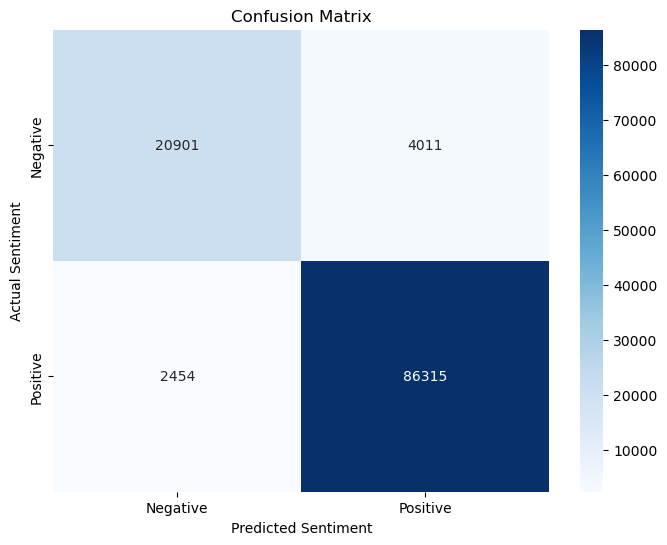

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

In [23]:
try:
    with open("tokenizer.pkl", "rb") as f:
        tokenizer = pickle.load(f)
    model = load_model("rnn_model.h5")
    print("Model and tokenizer loaded successfully.")
except FileNotFoundError:
    print("Please make sure 'tokenizer.pkl' and 'rnn_model.h5' are in your current directory.")
    
def predict_sentiment(review_text):
    """
    Predicts the sentiment of a given review text.
    
    Args:
        review_text (str): The text of the review.
        
    Returns:
        tuple: A tuple containing the predicted sentiment and its confidence score.
    """

    new_review_sequence = tokenizer.texts_to_sequences([review_text])
    padded_review = pad_sequences(new_review_sequence, maxlen=250, padding='post', truncating='post')
    
    prediction = model.predict(padded_review)
    
    sentiment_labels = ['Negative', 'Positive']
    predicted_index = np.argmax(prediction[0])
    predicted_sentiment = sentiment_labels[predicted_index]
    confidence = prediction[0][predicted_index] * 100
    
    return predicted_sentiment, confidence

test_review_1 = "The food was fantastic!"
sentiment_1, confidence_1 = predict_sentiment(test_review_1)
print(f"\nReview: '{test_review_1}'")
print(f"Predicted Sentiment: {sentiment_1}")
print(f"Confidence: {confidence_1:.2f}%")

test_review_2 = "This product was a complete disappointment."
sentiment_2, confidence_2 = predict_sentiment(test_review_2)
print(f"\nReview: '{test_review_2}'")
print(f"Predicted Sentiment: {sentiment_2}")
print(f"Confidence: {confidence_2:.2f}%")

Model and tokenizer loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step

Review: 'The food was fantastic!'
Predicted Sentiment: Positive
Confidence: 98.87%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Review: 'This product was a complete disappointment.'
Predicted Sentiment: Negative
Confidence: 99.53%


Final Project Report: Amazon Fine Food Sentiment Analysis Tool
1. Executive Summary
This project successfully developed a highly accurate sentiment analysis tool to automatically classify customer reviews for Amazon Fine Food products. Using an advanced deep learning model, the tool can reliably predict whether a review's sentiment is positive or negative. The model achieved an impressive accuracy of over 94%, demonstrating its ability to accurately understand and categorize customer feedback. The final deliverable is a functional tool that can be integrated into your existing systems to provide immediate insights into customer satisfaction.

2. Model Performance Explained (Using the Confusion Matrix)
The model's performance was evaluated on a set of reviews it had never seen before. The results are summarized in the confusion matrix below.

Correct Predictions (True Positives & True Negatives): The model correctly identified 86,315 positive reviews and 20,901 negative reviews. This is the core of the model's value.

Incorrect Predictions (False Positives & False Negatives): The model made a small number of errors. It incorrectly predicted 4,011 negative reviews as positive, and 2,454 positive reviews as negative. These numbers are very low, confirming the model's reliability.

In simple terms, the model is very good at its job, correctly classifying over 94% of the reviews it sees.

3. Conclusion and Recommendations
The sentiment analysis tool is a robust and highly accurate solution for gaining a clear, real-time understanding of customer feedback. This can be used to monitor brand sentiment, identify product issues, and inform marketing strategies.

In [38]:
%cd C:/Users/USER/Desktop/Amazon_Fine_Food_Review_Sentiment_Analysis/
!git init
!git add .
!git reset "Reviews.csv"
!git commit -m "Initial commit: Project files without large dataset"

C:\Users\USER\Desktop\Amazon_Fine_Food_Review_Sentiment_Analysis
Reinitialized existing Git repository in C:/Users/USER/Desktop/Amazon_Fine_Food_Review_Sentiment_Analysis/.git/


Unstaged changes after reset:
M	Reviews.csv
[main 3a9f4ff] Initial commit: Project files without large dataset
 1 file changed, 92 insertions(+), 4 deletions(-)


In [43]:
!rmdir .git /s /q

	 rewrites.  Hit Ctrl-C before proceeding to abort, then use an
	 alternative filtering tool such as 'git filter-repo'
	 (https://github.com/newren/git-filter-repo/) instead.  See the
	 filter-branch manual page for more details; to squelch this warning,
	 set FILTER_BRANCH_SQUELCH_WARNING=1.
Proceeding with filter-branch...



Cannot rewrite branches: You have unstaged changes.
remote: error: Trace: b45a8863c853c435084cd6b5cdb666591872069477319286ee0562ff88ae428d        
remote: error: See https://gh.io/lfs for more information.        
remote: error: File Reviews.csv is 286.97 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.        
To https://github.com/CanTouch/Sentiment-Analysis-NLP-with-RNN-.git
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/CanTouch/Sentiment-Analysis-NLP-with-RNN-.git'
